### Problem Statement:
Solving this problem will help you to gain a basic understanding of the HR industry and also how analytics and data science are applied in practice in this domain.

### Understanding the Problem Statement:
In this project, you will have to put yourself in the shoes of an HR analytics expert and by leveraging the data provided, you are supposed to identify how salary is varying with respect to other considerable factors.

The dataset should be divided into test and train and you would have to use the training data to build the model and thereby apply it to test data to measure the performance and robustness of the model.

In [1]:
pip install phik

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

In [3]:
hr_df = pd.read_csv("F:\GreyCampus-Datascience\DS5\ML\Capstone_Project/New_data_Set.csv")
hr_df.head(5)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


### Steps to be performed for successful completion of capstone project:

#### 1. Understand the data set - Feature description provided below.

#### Feature Description

1. Gender - talks of the gender - Male or female
2. Business - if the person has a business or no
3. Age - age of the person
4. Salary - CTC of the employee
5. Dependants - number of people dependant on the person
6. Months - duration of the person employed with the company
7. Calls - if the person has authority to make calls or not
8. Type - salary settlement type
9. Billing - Subscribed to billing plans or no
10. Unit sales - unit sale made by the person
11. Total sales - total sales made by the person
12. Rating - If he has been given a rating by a superior or no
13. Bonus - amount received by a person as bonus for sales
14. Base pay - Base pay of the employee
15. Unit price - The Unit price of a sale
16. Volume - volume allotted to a person
17. Opening balance - The opening balance of an employee
18. Low - lowest balance allotted to a person.
19. Closing Balance- The closing balance of an employee
20. Education- Educational background of an employee

In [4]:
# Get information about the dataset

hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

As we can see, there are 5000 records in the dataset with 20 features.

Amongst these 20 features, 8 are categorical and 12 are numerical.

#### The feature "Total_Sales" has been falsely classified as a categorical variable. We have to change the datatype of that feature to float.

In [5]:
# Change the datatype to numeric while filling the missing values with NaN

hr_df['Total_Sales'] = pd.to_numeric(hr_df['Total_Sales'],errors = 'coerce')
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4984 non-null   f

#### Now, we have 13 numeric and 7 categorical features.

In [6]:
# Describe the numeric features.

hr_df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,4984.000000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,2272.373977,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,2267.717435,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,18.800000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,387.350000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,1395.650000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,3744.687500,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,8684.800000,72.00000


In [7]:
# Detailed description of all the features.

hr_df.describe(include = 'all')

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
count,5000,5000.000000,5000,5000,5000,5000,5000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,4984.000000,5000.00000,5000
unique,2,NaN,2,2,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Male,NaN,No,Yes,Month-to-month,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PG
freq,2528,NaN,3524,4539,2777,2956,3682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2979
mean,NaN,0.160000,NaN,NaN,NaN,NaN,NaN,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,2272.373977,32.18480,NaN
std,NaN,0.366643,NaN,NaN,NaN,NaN,NaN,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,2267.717435,24.63673,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,18.800000,0.00000,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,387.350000,8.00000,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,1395.650000,28.00000,NaN
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,3744.687500,55.00000,NaN


In [8]:
# Count of null values in each column

hr_df.isna().sum()

# hr_df.isnull().sum() can also be used

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

#### We can see that there are missing values in 3 columns.

Let us fill the missing values with the mean of the respective columns.

In [9]:
hr_df['Base_pay'].fillna (value = hr_df['Base_pay'].mean(), inplace = True)

hr_df['openingbalance'].fillna (value = hr_df['openingbalance'].mean(), inplace = True)

hr_df['Total_Sales'].fillna (value = hr_df['Total_Sales'].mean(), inplace = True)

In [10]:
hr_df.isna().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

### Check for Duplicated records

In [11]:
hr_df.duplicated().sum()

0

#### There are no duplicate records.

### Let us now start with Univariate analysis.

#### For the categorical features we will use BAR GRAPH and for the numerical features, we will use BOXPLOT

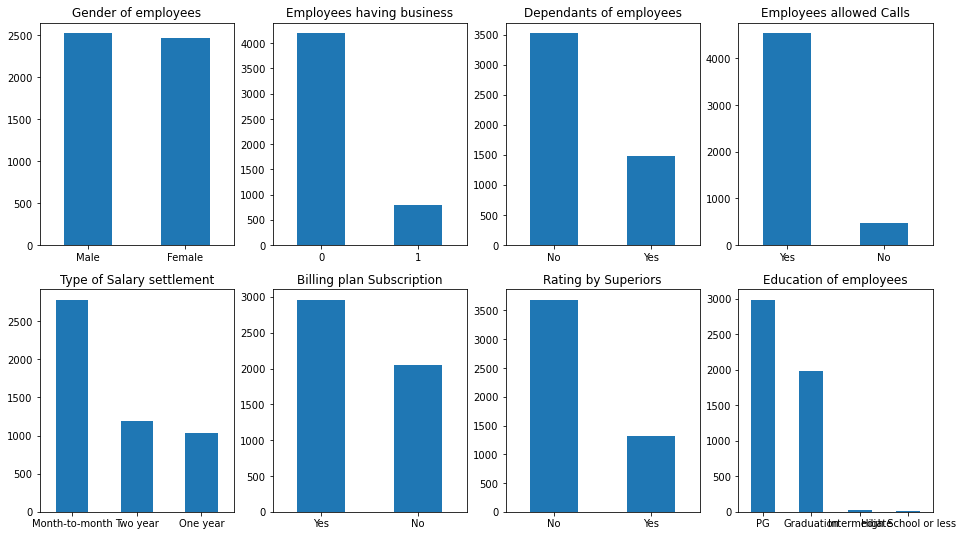

In [12]:
plt.subplot(241)

hr_df['Gender'].value_counts().plot(kind='bar', title='Gender of employees', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(242)

hr_df['Business'].value_counts().plot(kind='bar', title='Employees having business', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(243)

hr_df['Dependancies'].value_counts().plot(kind='bar', title='Dependants of employees', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(244)

hr_df['Calls'].value_counts().plot(kind='bar', title='Employees allowed Calls', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(245)

hr_df['Type'].value_counts().plot(kind='bar', title='Type of Salary settlement', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(246)

hr_df['Billing'].value_counts().plot(kind='bar', title='Billing plan Subscription', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(247)

hr_df['Rating'].value_counts().plot(kind='bar', title='Rating by Superiors', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(248)

hr_df['Education'].value_counts().plot(kind='bar', title='Education of employees', figsize=(16,9))

plt.xticks(rotation=0)
 
plt.show()

From these graphs, we can see that:
    
    1.Number of male and female employees are almost equal.
    2.Majority of the employees do not have their own business.
    3.Majority of the employees do not have any dependants.
    4.Majority of the employees are authorized to make calls.
    5.There are three types of salary settlements. Most of the employees get their salary every month.
    6.Most of the employees have subscribed to billing plans.
    7.Majority of the employees have not received rating by their superiors.
    8.Most of the employees are either Post Graduates or Graduates.

#### Let us plot the boxplot and distribution plot for the numerical variables

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


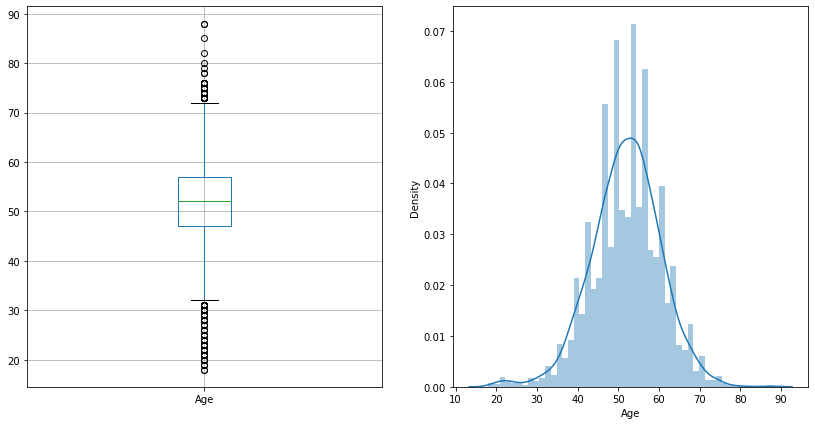

In [13]:
plt.figure(figsize=(14, 7)) 

plt.subplot(121)
hr_df.boxplot(column =['Age'])

plt.subplot(122)
sns.distplot(hr_df['Age'])

plt.show()

We can see that the age of 50% of the employees lies between 47 to 57. However, there are couple of outliers lesser than the mininum value (around 32) and greater than the maximun value (around 72).

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


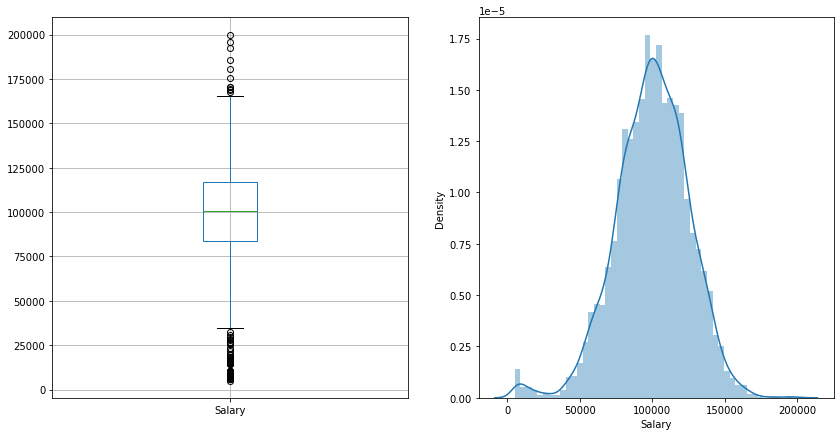

In [14]:
plt.figure(figsize=(14, 7)) 

plt.subplot(121)
hr_df.boxplot(column =['Salary'])

plt.subplot(122)
sns.distplot(hr_df['Salary'])

plt.show()

We can see that the salary of 50% of the employees lies between 84000 to 117000. However, there are couple of outliers lesser than the mininum value (around 30000) and greater than the maximun value (around 165000).

From the distribution plot, we can see that salary is normally distributed with the peak being at 100000.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


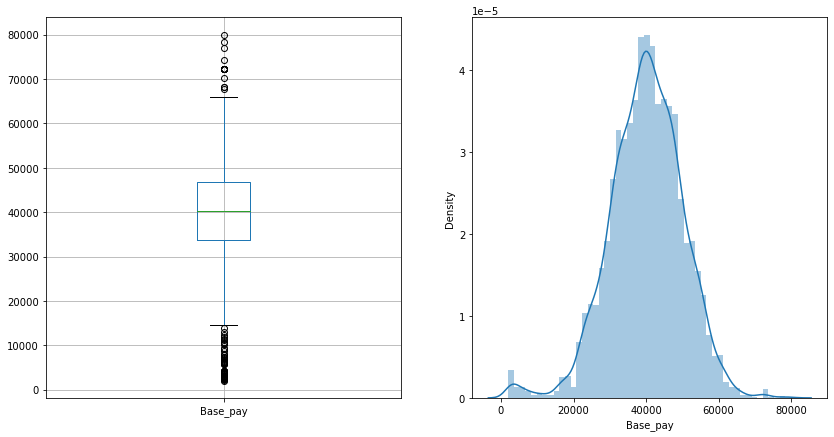

In [15]:
plt.figure(figsize=(14, 7)) 

plt.subplot(121)
hr_df.boxplot(column =['Base_pay'])

plt.subplot(122)
sns.distplot(hr_df['Base_pay'])

plt.show()

We can see that the Base_pay of 50% of the employees lies between 32000 to 48000. However, there are couple of outliers lesser than the mininum value (around 15000) and greater than the maximun value (around 66000).

From the distribution plot, we can see that Base_pay is normally distributed with the peak being at 40000.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


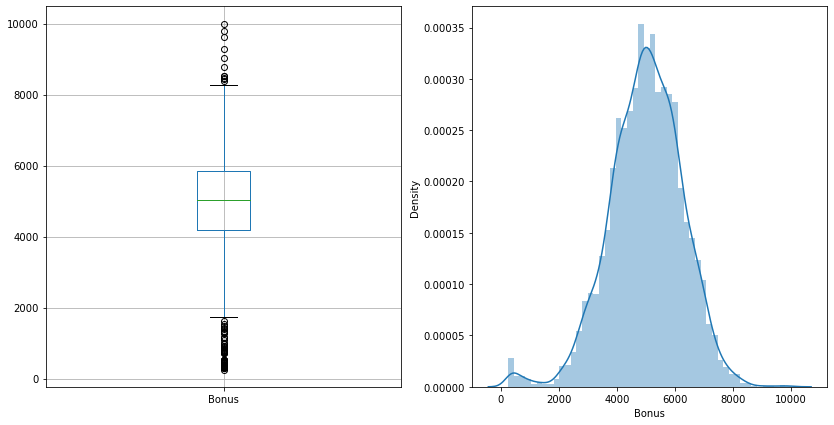

In [16]:
plt.figure(figsize=(14, 7)) 

plt.subplot(121)
hr_df.boxplot(column =['Bonus'])

plt.subplot(122)
sns.distplot(hr_df['Bonus'])

plt.show()

We can see that the Bonus of 50% of the employees lies between 4000 to 6000. However, there are couple of outliers lesser than the mininum value (around 2000) and greater than the maximun value (around 8000).

From the distribution plot, we can see that Bonus is normally distributed with the peak being at 5000.

<AxesSubplot:>

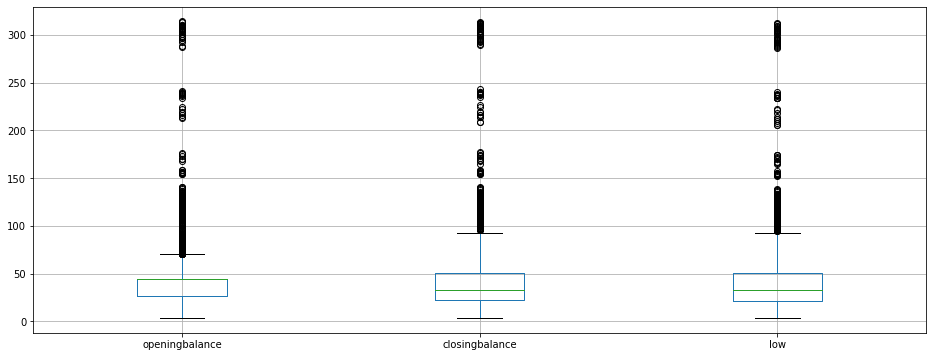

In [17]:
plt.figure(figsize=(16, 6))
hr_df.boxplot(column =['openingbalance','closingbalance','low'])

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

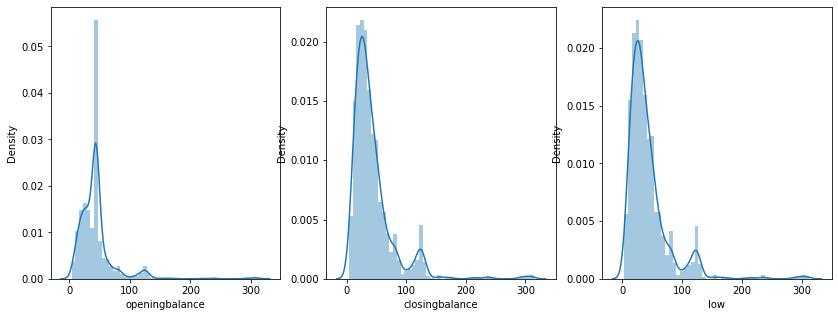

In [18]:
plt.figure(figsize=(14, 5)) 

plt.subplot(131)
sns.distplot(hr_df['openingbalance'])

plt.subplot(132)
sns.distplot(hr_df['closingbalance'])

plt.subplot(133)
sns.distplot(hr_df['low'])

plt.show()

The boxplots for opening balance, closing balance and lowest balance shows the presence of outliers greater than the maximum values.

The distribution plots show that they are positive (right) skewed.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


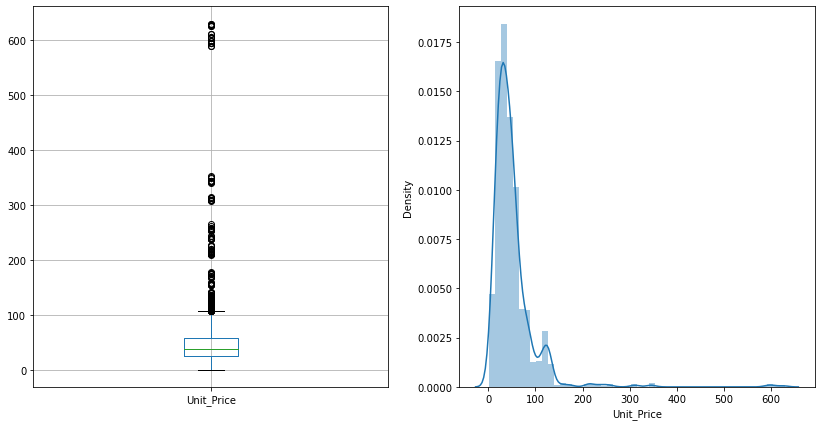

In [19]:
plt.figure(figsize=(14, 7)) 

plt.subplot(121)
hr_df.boxplot(column =['Unit_Price'])

plt.subplot(122)
sns.distplot(hr_df['Unit_Price'])

plt.show()

The boxplot for Unit Price shows the presence of outliers greater than the maximum value (around 100).

The distribution plots show that it is positive (right) skewed.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


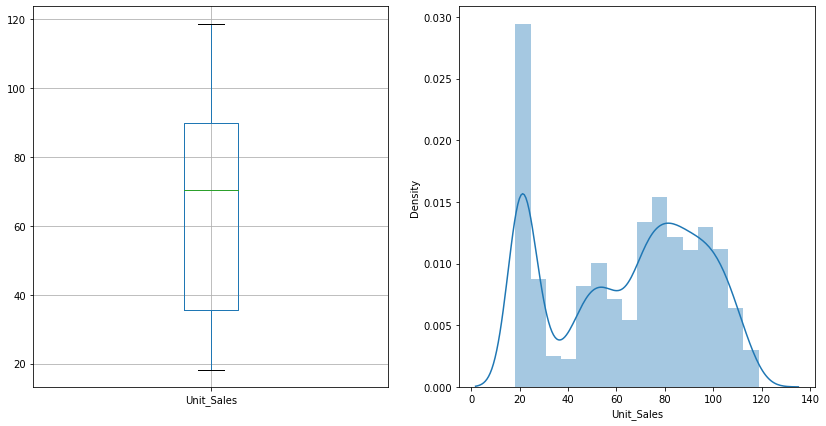

In [20]:
plt.figure(figsize=(14, 7)) 

plt.subplot(121)
hr_df.boxplot(column =['Unit_Sales'])

plt.subplot(122)
sns.distplot(hr_df['Unit_Sales'])

plt.show()

We can notice that there are no outliers present in Unit sales.

The distribution plot shows multiple peaks. Not normally distributed.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


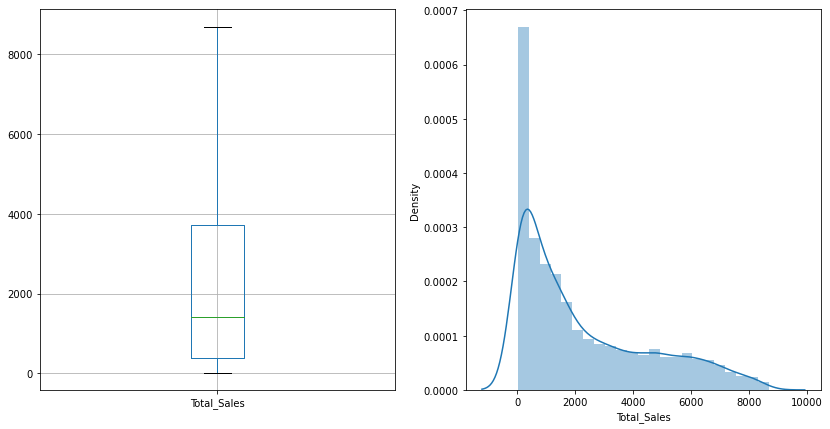

In [21]:
plt.figure(figsize=(14, 7)) 

plt.subplot(121)
hr_df.boxplot(column =['Total_Sales'])

plt.subplot(122)
sns.distplot(hr_df['Total_Sales'])

plt.show()

There is no presence of Outliers in Total Sales. The data is positive (right) skewed.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


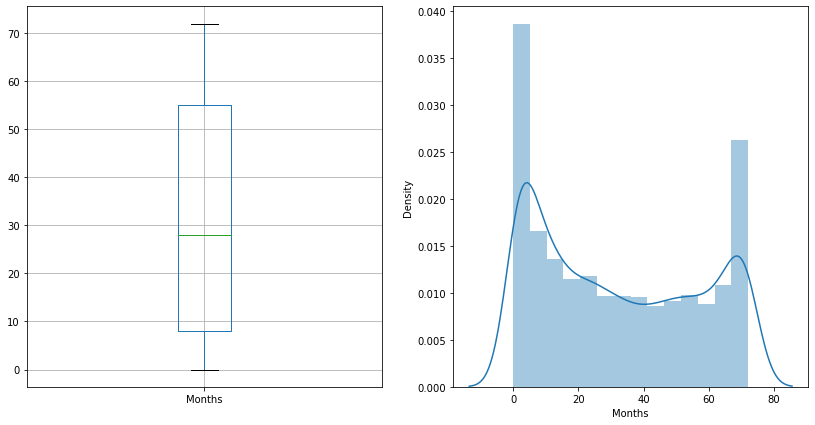

In [22]:
plt.figure(figsize=(14, 7)) 

plt.subplot(121)
hr_df.boxplot(column =['Months'])

plt.subplot(122)
sns.distplot(hr_df['Months'])

plt.show()

There are no outliers in the data as seen in the boxplot of Number of Months employed. There are multiple peaks as seen from the distribution plot.

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


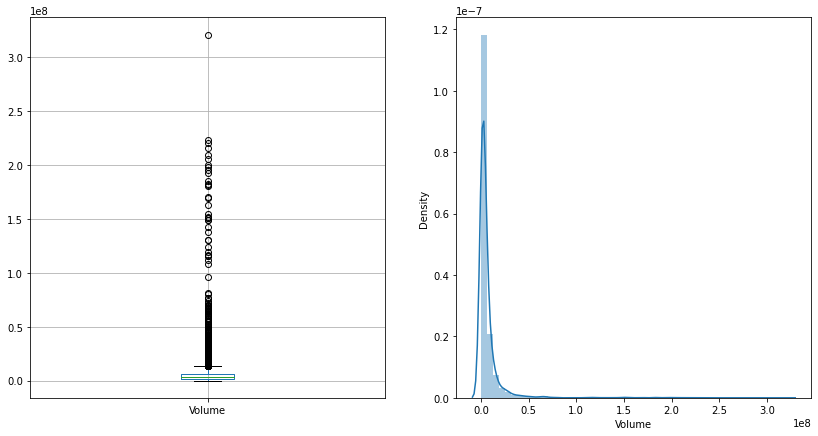

In [23]:
plt.figure(figsize=(14, 7)) 

plt.subplot(121)
hr_df.boxplot(column =['Volume'])

plt.subplot(122)
sns.distplot(hr_df['Volume'])

plt.show()

There are Outliers present in the Volume allocated. The distribution plot shows right (positive) skewed data.

### User defined function to identify Outliers

In [24]:
def id_out(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR= Q3-Q1
    low_whis = Q1-(1.5 * IQR)
    up_whis = Q3+(1.5 * IQR)
    return low_whis,up_whis

### Identify and replace Outliers with the lower and upper whisker values wherever needed.

In [25]:
lowsal, upsal= id_out(hr_df['Salary'])
hr_df['Salary']= np.where(hr_df['Salary']> upsal, upsal, hr_df['Salary'])
hr_df['Salary']= np.where(hr_df['Salary']< lowsal, lowsal, hr_df['Salary'])

<AxesSubplot:>

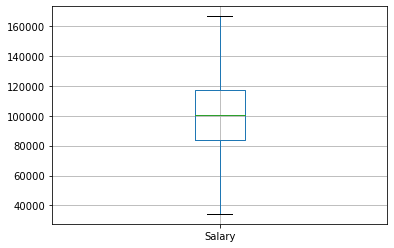

In [26]:
# Boxplot after removing Outliers.

hr_df.boxplot(column= ['Salary'])

In [27]:
lowage, upage= id_out(hr_df['Age'])
hr_df['Age']= np.where(hr_df['Age']> upage, upage, hr_df['Age'])
hr_df['Age']= np.where(hr_df['Age']< lowage, lowage, hr_df['Age'])

In [28]:
low, up= id_out(hr_df['Base_pay'])
hr_df['Base_pay']= np.where(hr_df['Base_pay']> up, up, hr_df['Base_pay'])
hr_df['Base_pay']= np.where(hr_df['Base_pay']< low, low, hr_df['Base_pay'])

In [29]:
low, up= id_out(hr_df['Bonus'])
hr_df['Bonus']= np.where(hr_df['Bonus']> up, up, hr_df['Bonus'])
hr_df['Bonus']= np.where(hr_df['Bonus']< low, low, hr_df['Bonus'])

In [30]:
low, up= id_out(hr_df['openingbalance'])
hr_df['openingbalance']= np.where(hr_df['openingbalance']> up, up, hr_df['openingbalance'])
hr_df['openingbalance']= np.where(hr_df['openingbalance']< low, low, hr_df['openingbalance'])

In [31]:
low, up= id_out(hr_df['closingbalance'])
hr_df['closingbalance']= np.where(hr_df['closingbalance']> up, up, hr_df['closingbalance'])
hr_df['closingbalance']= np.where(hr_df['closingbalance']< low, low, hr_df['closingbalance'])

In [32]:
low, up= id_out(hr_df['low'])
hr_df['low']= np.where(hr_df['low']> up, up, hr_df['low'])
hr_df['low']= np.where(hr_df['low']< low, low, hr_df['low'])

In [33]:
low, up= id_out(hr_df['Unit_Price'])
hr_df['Unit_Price']= np.where(hr_df['Unit_Price']> up, up, hr_df['Unit_Price'])
hr_df['Unit_Price']= np.where(hr_df['Unit_Price']< low, low, hr_df['Unit_Price'])

In [34]:
low, up= id_out(hr_df['Volume'])
hr_df['Volume']= np.where(hr_df['Volume']> up, up, hr_df['Volume'])
hr_df['Volume']= np.where(hr_df['Volume']< low, low, hr_df['Volume'])

### Find out the correlation between numeric variables using Spearman Rank correlation & explain.

In [35]:
from scipy import stats

In [36]:
stats.spearmanr(hr_df['Salary'], hr_df['Base_pay'])

SpearmanrResult(correlation=0.9940055722074116, pvalue=0.0)

#### There is a very high positive correlation (almost perfect) between Salary and Base pay

In [37]:
stats.spearmanr(hr_df['Salary'], hr_df['Bonus'])

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

#### There is a perfect positive correlation between Salary and Bonus.

In [38]:
stats.spearmanr(hr_df['Base_pay'], hr_df['Bonus'])

SpearmanrResult(correlation=0.9940055722074117, pvalue=0.0)

#### There is a almost perfect positive correlation between Base pay and Bonus.

#### Let us check the relational plot between Base pay and Bonus.

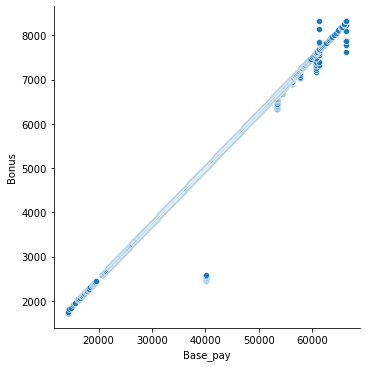

In [39]:
sns.relplot(x='Base_pay', y='Bonus', data= hr_df)

### We can see that there is a linear correlation between Base pay and Bonus. Hence, we can choose any one of these variables.

In [40]:
stats.spearmanr(hr_df['Salary'], hr_df['Unit_Sales'])

SpearmanrResult(correlation=0.999996272354915, pvalue=0.0)

#### There is a perfect positive correlation between Salary and Unit Sales.

In [41]:
stats.spearmanr(hr_df['Salary'], hr_df['Total_Sales'])

SpearmanrResult(correlation=0.9963669306302076, pvalue=0.0)

#### There is a perfect positive correlation between Salary and Total Sales.

In [42]:
stats.spearmanr(hr_df['Unit_Sales'], hr_df['Total_Sales'])

SpearmanrResult(correlation=0.9963553652279412, pvalue=0.0)

#### There is an almost perfect positive correlation between Unit Sales and Total Sales.

#### Let us check the relational plot between Unit Sales and Total Sales.

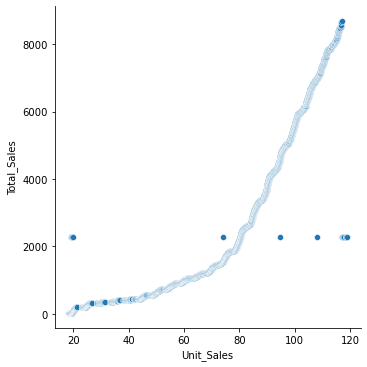

In [43]:
sns.relplot(x='Unit_Sales', y='Total_Sales', data= hr_df)

### We can see that there is an almost linear correlation between Unit Sales and Total Sales. 

In [44]:
stats.spearmanr(hr_df['Salary'], hr_df['low'])

SpearmanrResult(correlation=0.9996137977781203, pvalue=0.0)

#### There is an almost perfect positive correlation between Salary and Lowest Balance allotted.

In [45]:
stats.spearmanr(hr_df['Salary'], hr_df['Unit_Price'])

SpearmanrResult(correlation=0.8114005881443492, pvalue=0.0)

#### There is a very high perfect positive correlation between Salary and Unit price.

In [46]:
stats.spearmanr(hr_df['Salary'], hr_df['Months'])

SpearmanrResult(correlation=0.6037938126587963, pvalue=0.0)

#### There is a moderate positive correlation between Salary and Duration of employment.

In [47]:
stats.spearmanr(hr_df['Salary'], hr_df['openingbalance'])

SpearmanrResult(correlation=0.36904576921755955, pvalue=3.872894886162986e-161)

#### There is a low positive correlation between Salary and Opening balance.

In [48]:
stats.spearmanr(hr_df['Salary'], hr_df['closingbalance'])

SpearmanrResult(correlation=0.34620734248874435, pvalue=8.871173039780722e-141)

#### There is a low positive correlation between Salary and Closing balance.

In [49]:
stats.spearmanr(hr_df['openingbalance'], hr_df['closingbalance'])

SpearmanrResult(correlation=0.25124638204399596, pvalue=7.653859953274444e-73)

#### There is a very low positive correlation between Opening balance and Closing balance.

In [50]:
stats.spearmanr(hr_df['Salary'], hr_df['Age'])

SpearmanrResult(correlation=0.2022621866918085, pvalue=2.577205703916945e-47)

#### There is a very low positive correlation between Salary and Age

In [51]:
stats.spearmanr(hr_df['Salary'], hr_df['Volume'])

SpearmanrResult(correlation=-0.3905052613247804, pvalue=7.740393656725421e-182)

#### There is a low positive correlation between Salary and Volume allotted

In [52]:
#### We do not use Spearman Rank for categorical variables.

### Now, let us move on to Bivariate Analysis between the Categorical variables and dependent variable (Salary).

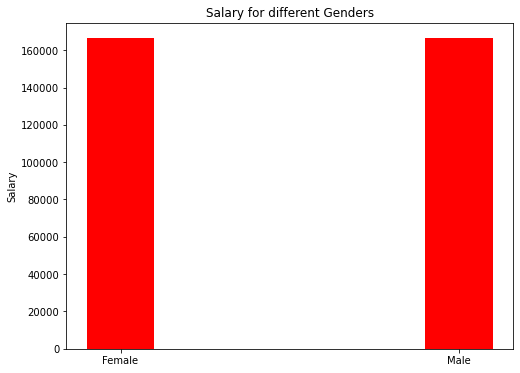

In [53]:
plt.figure(figsize=(8, 6))

plt.bar(hr_df['Gender'],hr_df['Salary'], width = 0.2, color= 'red')
plt.title("Salary for different Genders")
plt.ylabel("Salary")
plt.show()

#### We can see that Gender does not seem to have any affect on Salary

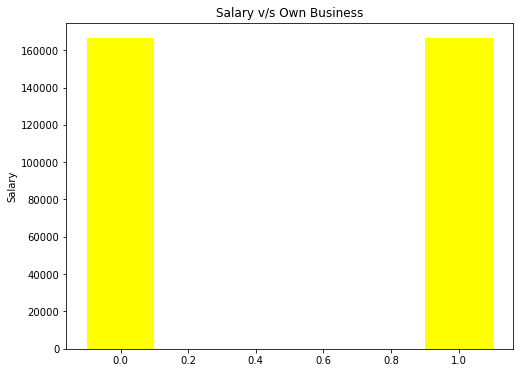

In [54]:
plt.figure(figsize=(8, 6))

plt.bar(hr_df['Business'],hr_df['Salary'], width = 0.2, color= 'yellow')
plt.title("Salary v/s Own Business")
plt.ylabel("Salary")
plt.show()

#### We can see that having their own business has no affect on Salary.

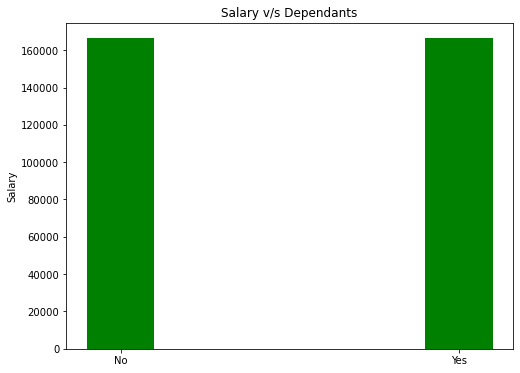

In [55]:
plt.figure(figsize=(8, 6))

plt.bar(hr_df['Dependancies'],hr_df['Salary'], width = 0.2, color= 'green')
plt.title("Salary v/s Dependants")
plt.ylabel("Salary")
plt.show()

#### We can see that the presence of dependants has no affect on the Salary

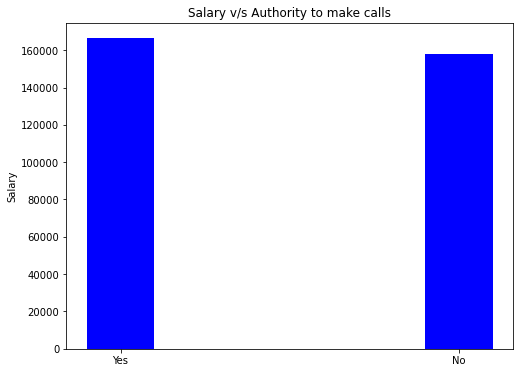

In [56]:
plt.figure(figsize=(8, 6))

plt.bar(hr_df['Calls'],hr_df['Salary'], width = 0.2, color= 'blue')
plt.title("Salary v/s Authority to make calls")
plt.ylabel("Salary")
plt.show()

#### We can see that the Authority to make calls does not seem to have any significant affect on the Salary.

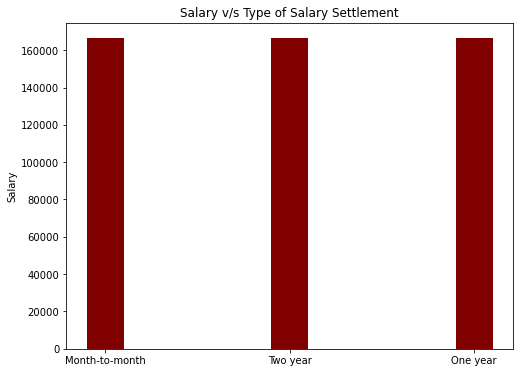

In [57]:
plt.figure(figsize=(8, 6))

plt.bar(hr_df['Type'],hr_df['Salary'], width = 0.2, color= 'maroon')
plt.title("Salary v/s Type of Salary Settlement")
plt.ylabel("Salary")
plt.show()

#### We can see that the Type of Salary Settlement has no significant affect on Salary.

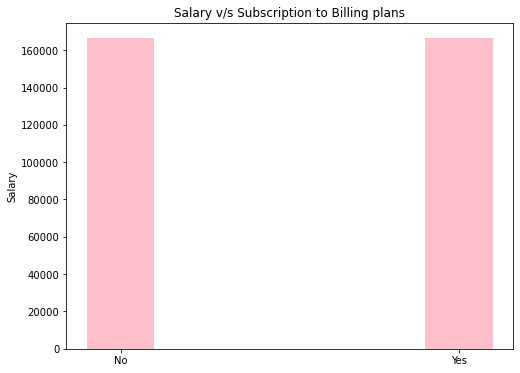

In [58]:
plt.figure(figsize=(8, 6))

plt.bar(hr_df['Billing'],hr_df['Salary'], width = 0.2, color= 'pink')
plt.title("Salary v/s Subscription to Billing plans")
plt.ylabel("Salary")
plt.show()

#### We can see that Subscription to Billing plans has no significant affect on the Salary.

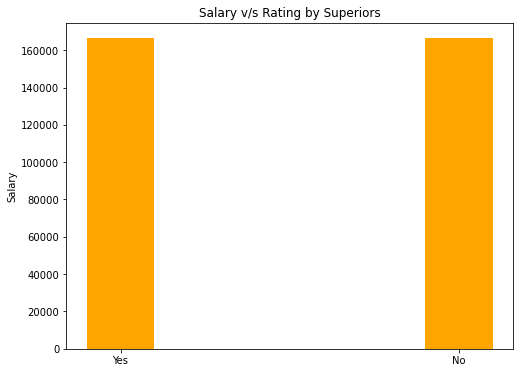

In [59]:
plt.figure(figsize=(8, 6))

plt.bar(hr_df['Rating'],hr_df['Salary'], width = 0.2, color= 'orange')
plt.title("Salary v/s Rating by Superiors")
plt.ylabel("Salary")
plt.show()

#### We can see that Rating given by Superiors has no affect on Salary.

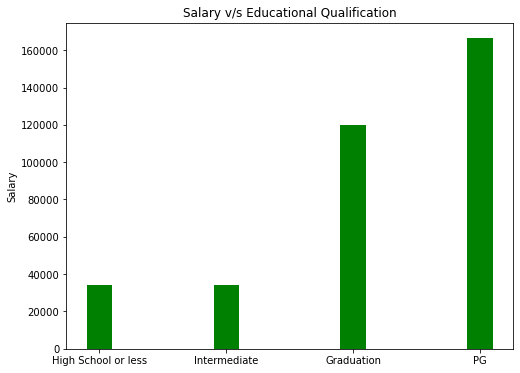

In [60]:
plt.figure(figsize=(8, 6))

plt.bar(hr_df['Education'],hr_df['Salary'], width = 0.2, color= 'green')
plt.title("Salary v/s Educational Qualification")
plt.ylabel("Salary")
plt.show()

#### We can see that higher the Educational Qualification, higher the Salary. Thus, there is an affect on Salary.

### Now, let us use a Heat Map using Pearson correlation to check for the correlation between the numeric variables.

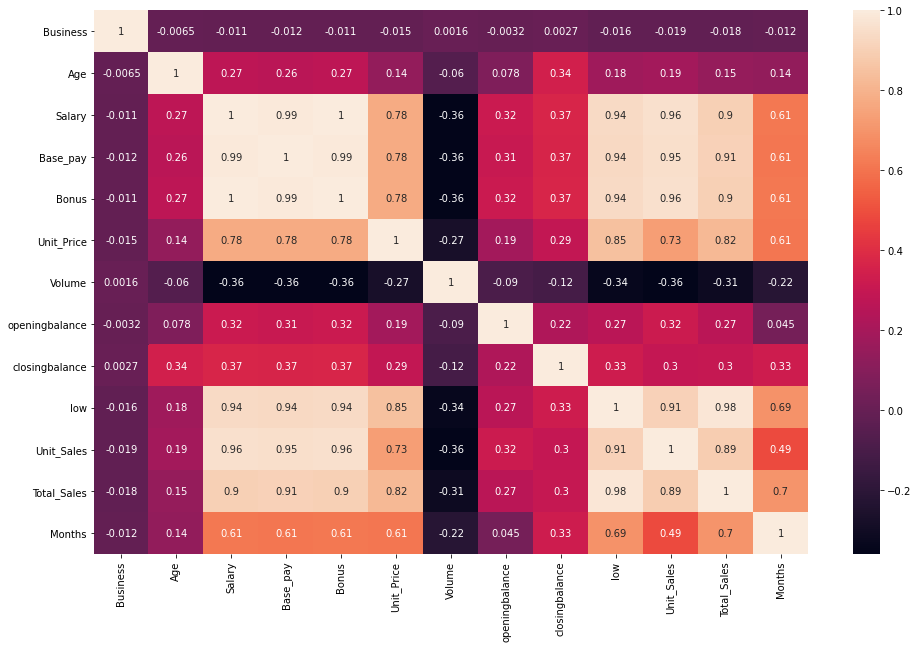

In [61]:
plt.figure(figsize=(16,10))

corr = hr_df.corr()
sns.heatmap(corr, annot= True)
plt.show()

### Let us use Phi_k Correlation Analyzer library to get the correlation between all categorical and numeric variables in a single Heat Map.

interval columns not set, guessing: ['Business', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume', 'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months']


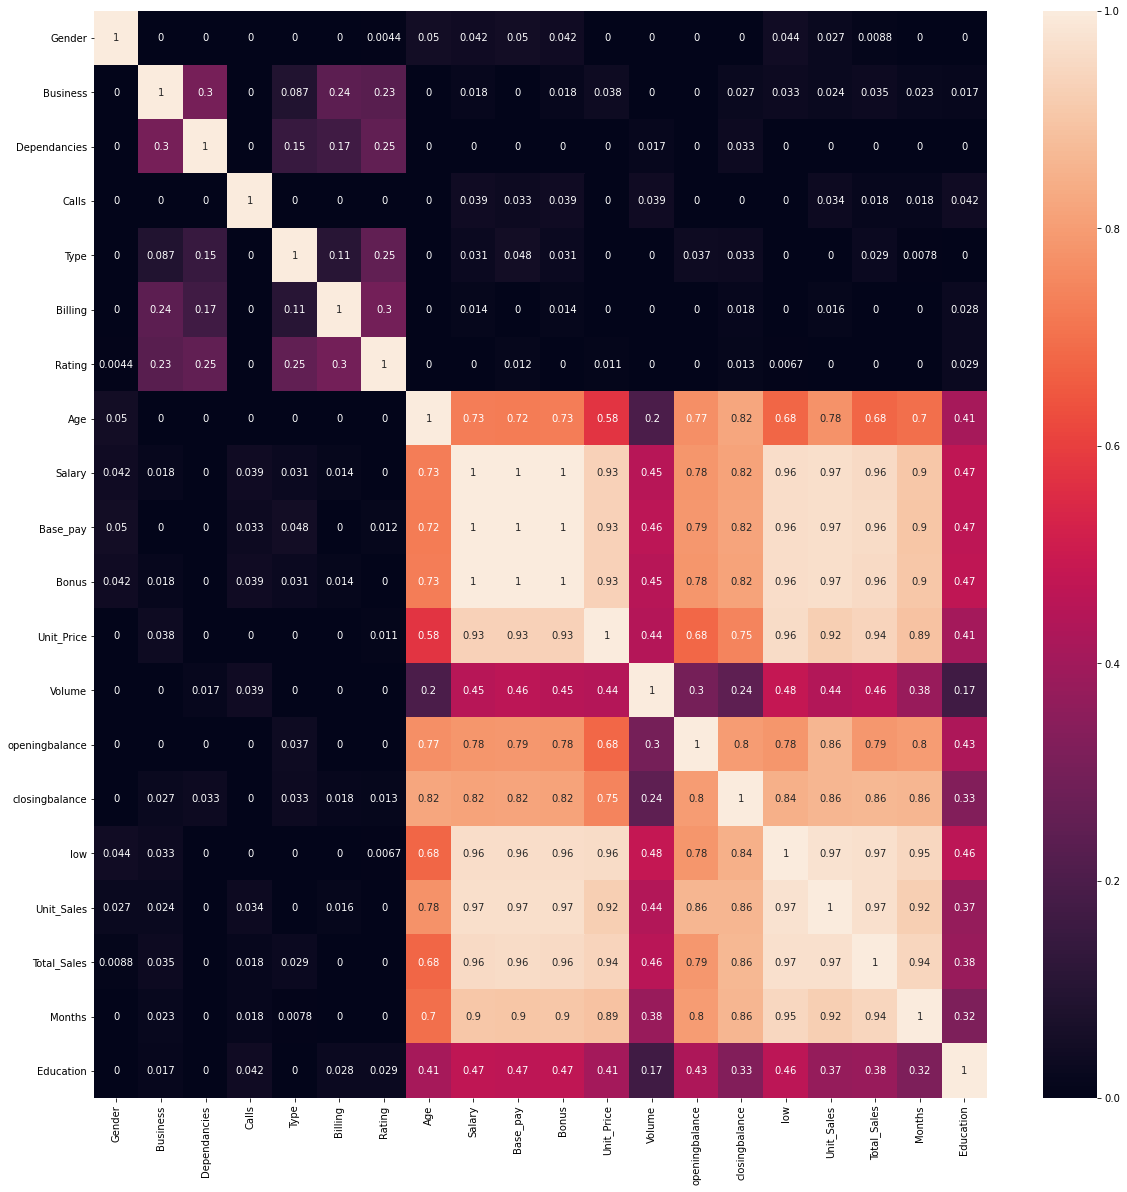

In [62]:
phik_corr= hr_df.phik_matrix()

plt.figure(figsize=(20,20))

sns.heatmap(phik_corr, annot= True)
plt.show()

#### From the Heat Maps, we can see that Base pay and Bonus have a perfect positive correlation with Salary.

#### Unit sales, Total sales, Low, Months, Unit price have a high positive correlation (>0.8) with Salary.

#### Education, Age and Closing balance have a moderate positive correlation (>0.5) with Salary.

#### Opening balance has a low positive correlation (0.41) with Salary

#### Business, Dependents, Type, Billing, Rating, Gender, Calls and Volume have no correlation (0 to 0.1) with Salary.

### Select the DEPENDENT variable as Salary

In [63]:
y= hr_df['Salary']

### Select the INDEPENDENT variables/ features

In [70]:
X = pd.DataFrame(np.c_[hr_df['Base_pay'],hr_df['Bonus'],hr_df['Unit_Sales'],hr_df['Total_Sales'],hr_df['low'],hr_df['Months'],hr_df['Unit_Price'], hr_df['closingbalance'],hr_df['Age'],hr_df['Education']], columns= ['Base_pay','Bonus','Unit_Sales','Total_Sales','low','Months','Unit_Price', 'closingbalance','Age','Education'])
X.head()

,Base_pay,Bonus,Unit_Sales,Total_Sales,low,Months,Unit_Price,closingbalance,Age,Education
0,14212.8,1717.89,18.25,18.8,3.65,0,3.77,3.76,32,High School or less
1,14212.8,1717.89,18.4,18.85,3.65,0,3.74,3.68,32,High School or less
2,14212.8,1717.89,18.7,18.9,3.72,0,3.89,4.29,32,High School or less
3,14212.8,1717.89,18.75,19,3.83,0,4.35,4.31,32,High School or less
4,14212.8,1717.89,18.8,19.05,4.08,1,4.34,4.41,32,High School or less


### Normalizing and Scaling data

#### Since the variables are of different scales, let us scale the variables (numeric) and encode the categorical variable.

In [75]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [76]:
X['Bonus'] = std_scale.fit_transform(X[['Bonus']])

In [77]:
X['Base_pay'] = std_scale.fit_transform(X[['Base_pay']])
X['Unit_Sales'] = std_scale.fit_transform(X[['Unit_Sales']])
X['Total_Sales'] = std_scale.fit_transform(X[['Total_Sales']])
X['low'] = std_scale.fit_transform(X[['low']])
X['Months'] = std_scale.fit_transform(X[['Months']])
X['Unit_Price'] = std_scale.fit_transform(X[['Unit_Price']])
X['closingbalance'] = std_scale.fit_transform(X[['closingbalance']])
X['Age'] = std_scale.fit_transform(X[['Age']])

In [78]:
X.head()

,Base_pay,Bonus,Unit_Sales,Total_Sales,low,Months,Unit_Price,closingbalance,Age,Education
0,-2.676266,-2.689645,-1.546007,-0.995457,-1.500042,-1.306505,-1.541890,-1.497891,-2.435515,High School or less
1,-2.676266,-2.689645,-1.541030,-0.995435,-1.500042,-1.306505,-1.542981,-1.501213,-2.435515,High School or less
2,-2.676266,-2.689645,-1.531075,-0.995413,-1.497098,-1.306505,-1.537525,-1.475885,-2.435515,High School or less
3,-2.676266,-2.689645,-1.529416,-0.995369,-1.492471,-1.306505,-1.520791,-1.475054,-2.435515,High School or less
4,-2.676266,-2.689645,-1.527757,-0.995346,-1.481955,-1.265911,-1.521154,-1.470902,-2.435515,High School or less


#### Encode the categorical variable "Education"

In [79]:
ed_enc=pd.get_dummies(data=X['Education'],drop_first=True)
ed_enc

,High School or less,Intermediate,PG
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4995,0,0,1
4996,0,0,1
4997,0,0,1
4998,0,0,1


In [80]:
X= pd.concat([X, ed_enc],axis=1)
X.drop('Education', axis= 1, inplace= True)

In [81]:
X.head(3)

,Base_pay,Bonus,Unit_Sales,Total_Sales,low,Months,Unit_Price,closingbalance,Age,High School or less,Intermediate,PG
0,-2.676266,-2.689645,-1.546007,-0.995457,-1.500042,-1.306505,-1.541890,-1.497891,-2.435515,1,0,0
1,-2.676266,-2.689645,-1.541030,-0.995435,-1.500042,-1.306505,-1.542981,-1.501213,-2.435515,1,0,0
2,-2.676266,-2.689645,-1.531075,-0.995413,-1.497098,-1.306505,-1.537525,-1.475885,-2.435515,1,0,0


### Let us now split the data into TEST and TRAIN

In [82]:
from sklearn.model_selection import train_test_split

# Split the data into train and test with 80% data in train and Random state as 5.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

### We are dealing with a REGRESSION problem.

### Let us use the LINEAR REGRESSION MODEL to train the data

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

#### Evaluate the model for the training set

In [84]:
y_train_predict = lin_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.902388440809595e-06
R2 score is 1.0


#### Evaluate the model for the testing set

In [85]:
y_test_predict = lin_reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 3.886464360124901e-06
R2 score is 1.0


### The low RMSE value and perfect R squared value for both the training and testing data suggests a good prediction model.

### Let us drop the features Bonus and Total_Sales and then use the Linear Regression model to train the data

In [86]:
X1 = pd.DataFrame(np.c_[X['Base_pay'],X['Unit_Sales'],X['low'],X['Months'],X['Unit_Price'],X['closingbalance'],X['Age'],X['High School or less'],X['Intermediate'],X['PG']], columns= ['Base_pay','Unit_Sales','low','Months','Unit_Price', 'closingbalance','Age','High School or less','Intermediate','PG'])
X1.head()

,Base_pay,Unit_Sales,low,Months,Unit_Price,closingbalance,Age,High School or less,Intermediate,PG
0,-2.676266,-1.546007,-1.500042,-1.306505,-1.541890,-1.497891,-2.435515,1.0,0.0,0.0
1,-2.676266,-1.541030,-1.500042,-1.306505,-1.542981,-1.501213,-2.435515,1.0,0.0,0.0
2,-2.676266,-1.531075,-1.497098,-1.306505,-1.537525,-1.475885,-2.435515,1.0,0.0,0.0
3,-2.676266,-1.529416,-1.492471,-1.306505,-1.520791,-1.475054,-2.435515,1.0,0.0,0.0
4,-2.676266,-1.527757,-1.481955,-1.265911,-1.521154,-1.470902,-2.435515,1.0,0.0,0.0


In [87]:
# Split the data into train and test with 80% data in train and Random state as 5.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state=5)

In [88]:
# Fit the model to the training data

lin_reg.fit(X1_train, y1_train)

LinearRegression()

In [89]:
# Evaluate the model for the training set

y1_train_predict = lin_reg.predict(X1_train)
rmse = (np.sqrt(mean_squared_error(y1_train, y1_train_predict)))
r2 = r2_score(y1_train, y1_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2989.0027178507708
R2 score is 0.985183042736226


In [90]:
# Evaluate the model for the testing set

y1_test_predict = lin_reg.predict(X1_test)
rmse = (np.sqrt(mean_squared_error(y1_test, y1_test_predict)))
r2 = r2_score(y1_test, y1_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 2800.2838276961024
R2 score is 0.9862994359738662


### We can see that by removing the two features, the RMSE value has increased drastically. The R squared value has also seen a slight dip.

### As an alternate approach, let us use Decision Tree Regressor to train the data

In [91]:
# Import the Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [92]:
# Check the score of training and testing

print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))

0.9688301172662853
0.9658880376110714


### We can see that both the Training and Testing score have a very good DTR score approximately 97%

In [93]:
# Increase the max_depth from 3 to 7 and check

DTR1 = DecisionTreeRegressor(max_depth=7)
DTR1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [94]:
# Check the score of training and testing

print(DTR1.score(X_train,y_train))
print(DTR1.score(X_test,y_test))

0.9998898313327316
0.9997365847380779


### By increasing the depth to 7, we have a near perfect DTR score for both Training and Testing

### As an alternate approach, let us use Random Forest Regressor to train the data

In [95]:
# Import the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=3)
RF.fit(X_train,y_train.ravel())

RandomForestRegressor(n_estimators=3)

In [96]:
# Check the score of training and testing

print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

0.9999810220265418
0.9999596905865195


### The Random Forest Regressor with n_estimators as 3 has a near perfect RF score for both training and testing data.